<a href="https://colab.research.google.com/github/MitziC3/Actividad5_Regresi-n_lineal/blob/main/M%C3%A9xico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving DF_Mexico.csv to DF_Mexico.csv


In [ ]:
df=pd.read_csv('DF_Mexico.csv')

In [ ]:
df.info

<bound method DataFrame.info of                        id                                      listing_url  \
0                 2056638             https://www.airbnb.com/rooms/2056638   
1                 2072354             https://www.airbnb.com/rooms/2072354   
2                  696037              https://www.airbnb.com/rooms/696037   
3                   35797               https://www.airbnb.com/rooms/35797   
4                   44616               https://www.airbnb.com/rooms/44616   
...                   ...                                              ...   
24219  853923589855678923  https://www.airbnb.com/rooms/853923589855678923   
24220  853966732274073000  https://www.airbnb.com/rooms/853966732274073000   
24221  854225071295768399  https://www.airbnb.com/rooms/854225071295768399   
24222  854247693069190865  https://www.airbnb.com/rooms/854247693069190865   
24223  854260329845513725  https://www.airbnb.com/rooms/854260329845513725   

            scrape_id last_scra

In [ ]:
#seleccionamos las columnas que vamos a utilizar
df1 = df.loc [: , ["host_acceptance_rate","host_response_rate", "review_scores_location",
                     "review_scores_cleanliness", "price", "availability_365",
                      "number_of_reviews", "reviews_per_month", "review_scores_communication"]]
df1

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,NaN,100%,5.00,4.95,"$1,434.00",324,21,0.19,4.95
1,NaN,NaN,4.95,4.88,$830.00,346,61,0.54,5.00
2,90%,100%,4.58,4.71,"$1,469.00",87,39,0.31,4.92
3,NaN,NaN,NaN,NaN,"$3,658.00",363,0,NaN,NaN
4,86%,100%,4.98,4.70,"$18,000.00",357,64,0.46,4.78
...,...,...,...,...,...,...,...,...,...
24219,100%,100%,NaN,NaN,$760.00,352,0,NaN,NaN
24220,NaN,NaN,NaN,NaN,"$1,520.00",365,0,NaN,NaN
24221,96%,NaN,NaN,NaN,$533.00,180,0,NaN,NaN
24222,100%,100%,NaN,NaN,"$1,200.00",344,0,NaN,NaN


In [ ]:
#IDENTIFICAR VALORES NULOS
valores_nulos=df1.isnull().sum()
valores_nulos

host_acceptance_rate           2043
host_response_rate             3091
review_scores_location         3653
review_scores_cleanliness      3651
price                             0
availability_365                  0
number_of_reviews                 0
reviews_per_month              3596
review_scores_communication    3652
dtype: int64

In [ ]:
#reemplazamos los valores nulos
df1=df1.fillna(method="bfill")
df2=df1.fillna(method="ffill")


valores_nulos1=df2.isnull().sum()
valores_nulos1

host_acceptance_rate           0
host_response_rate             0
review_scores_location         0
review_scores_cleanliness      0
price                          0
availability_365               0
number_of_reviews              0
reviews_per_month              0
review_scores_communication    0
dtype: int64

In [ ]:
#añadimos la variable con la que se hará la correlación
room = df.loc[: , 'room_type']
room

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
24219    Entire home/apt
24220    Entire home/apt
24221       Private room
24222    Entire home/apt
24223    Entire home/apt
Name: room_type, Length: 24224, dtype: object

In [ ]:
valores_nulos2=room.isnull().sum()
valores_nulos2

0

In [ ]:
#dataframe completo
df_mexico = pd.concat([df2, room], axis=1)
df_mexico

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,room_type
0,90%,100%,5.00,4.95,"$1,434.00",324,21,0.19,4.95,Entire home/apt
1,90%,100%,4.95,4.88,$830.00,346,61,0.54,5.00,Entire home/apt
2,90%,100%,4.58,4.71,"$1,469.00",87,39,0.31,4.92,Entire home/apt
3,86%,100%,4.98,4.70,"$3,658.00",363,0,0.46,4.78,Entire home/apt
4,86%,100%,4.98,4.70,"$18,000.00",357,64,0.46,4.78,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...
24219,100%,100%,5.00,5.00,$760.00,352,0,1.00,5.00,Entire home/apt
24220,96%,100%,5.00,5.00,"$1,520.00",365,0,1.00,5.00,Entire home/apt
24221,96%,100%,5.00,5.00,$533.00,180,0,1.00,5.00,Private room
24222,100%,100%,5.00,5.00,"$1,200.00",344,0,1.00,5.00,Entire home/apt


In [ ]:
#Primer filtro de la columna room
dfMexico_home = df_mexico[df_mexico["room_type"] == "Entire home/apt"]
dfMexico_home1 = dfMexico_home.drop(['room_type',], axis = 1)
dfMexico_home1

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,90%,100%,5.00,4.95,"$1,434.00",324,21,0.19,4.95
1,90%,100%,4.95,4.88,$830.00,346,61,0.54,5.00
2,90%,100%,4.58,4.71,"$1,469.00",87,39,0.31,4.92
3,86%,100%,4.98,4.70,"$3,658.00",363,0,0.46,4.78
4,86%,100%,4.98,4.70,"$18,000.00",357,64,0.46,4.78
...,...,...,...,...,...,...,...,...,...
24217,100%,100%,5.00,5.00,$980.00,342,0,1.00,5.00
24219,100%,100%,5.00,5.00,$760.00,352,0,1.00,5.00
24220,96%,100%,5.00,5.00,"$1,520.00",365,0,1.00,5.00
24222,100%,100%,5.00,5.00,"$1,200.00",344,0,1.00,5.00


In [ ]:
#quitamos signos de home
dfMexico_home1['host_acceptance_rate']=dfMexico_home1['host_acceptance_rate'].str.replace('%','')
dfMexico_home1['host_response_rate']=dfMexico_home1['host_response_rate'].str.replace('%','')
dfMexico_home1['price']=dfMexico_home1['price'].str.replace('$','').str.replace(',', '')

<ipython-input-150-965d0cb7f41e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfMexico_home1['price']=dfMexico_home1['price'].str.replace('$','').str.replace(',', '')


In [ ]:
#convertimos home
dfMexico_home1['host_acceptance_rate'] = dfMexico_home1['host_acceptance_rate'].astype(float)
dfMexico_home1['host_response_rate'] = dfMexico_home1['host_response_rate'].astype(float)
dfMexico_home1['price'] = dfMexico_home1['price'].astype(float)

In [ ]:
#Segundo filtro Private room"
dfMexico_proom= df_mexico[df_mexico["room_type"] == "Private room"]
dfMexico_proom1= dfMexico_proom.drop(['room_type'], axis = 1)
dfMexico_proom1

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,100%,100%,4.94,4.90,"$1,089.00",168,62,0.94,4.95
16,0%,0%,4.80,4.20,$726.00,363,5,0.04,4.60
17,0%,0%,4.40,4.60,$375.00,284,5,0.04,4.80
18,0%,100%,4.89,5.00,"$2,835.00",365,0,0.12,4.78
21,40%,100%,5.00,4.91,"$1,244.00",88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...
24200,100%,100%,5.00,5.00,"$1,280.00",301,0,1.00,5.00
24213,100%,100%,5.00,5.00,$750.00,176,0,1.00,5.00
24215,100%,100%,5.00,5.00,$600.00,345,0,1.00,5.00
24218,100%,100%,5.00,5.00,$251.00,364,0,1.00,5.00


In [ ]:
#quitamos signos de private room
dfMexico_proom1['host_acceptance_rate']=dfMexico_proom1['host_acceptance_rate'].str.replace('%','')
dfMexico_proom1['host_response_rate']=dfMexico_proom1['host_response_rate'].str.replace('%','')
dfMexico_proom1['price']=dfMexico_proom1['price'].str.replace('$','').str.replace(',', '')

<ipython-input-153-57d0127054a5>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfMexico_proom1['price']=dfMexico_proom1['price'].str.replace('$','').str.replace(',', '')


In [ ]:
#convertimos private room
dfMexico_proom1['host_acceptance_rate'] = dfMexico_proom1['host_acceptance_rate'].astype(float)
dfMexico_proom1['host_response_rate'] = dfMexico_proom1['host_response_rate'].astype(float)
dfMexico_proom1['price'] = dfMexico_proom1['price'].astype(float)

In [ ]:
#Tercer filtro Hotel room"
dfMexico_hotel= df_mexico[df_mexico["room_type"] == "Hotel room"]
dfMexico_hotel1= dfMexico_hotel.drop(['room_type'], axis = 1)
dfMexico_hotel1

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
14,87%,90%,4.83,4.83,"$1,006.00",340,23,0.18,5.00
53,87%,90%,4.97,4.94,"$1,006.00",332,31,0.25,5.00
55,87%,90%,5.00,4.92,$908.00,350,49,0.46,5.00
62,87%,90%,4.95,4.95,$908.00,356,22,0.25,5.00
66,86%,100%,5.00,5.00,"$3,162.00",287,7,0.07,5.00
...,...,...,...,...,...,...,...,...,...
9495,100%,100%,5.00,5.00,$0.00,0,3,0.12,5.00
9537,100%,100%,4.87,4.86,$0.00,0,0,2.02,4.75
9539,100%,100%,1.00,1.00,$0.00,0,0,0.20,1.00
9544,98%,90%,4.59,4.53,$0.00,0,0,0.50,4.47


In [ ]:
#Cuarto filtro Shared room"
dfMexico_shared= df_mexico[df_mexico["room_type"] == "Shared room"]
dfMexico_shared1= dfMexico_shared.drop(['room_type'], axis = 1)
dfMexico_shared1

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
174,0%,100%,4.98,4.92,"$1,815.00",365,0,0.69,4.94
437,86%,50%,4.78,4.67,$182.00,346,9,0.10,5.00
443,100%,90%,4.68,4.93,$450.00,302,70,0.73,4.91
472,96%,100%,4.80,4.48,$272.00,354,25,0.26,4.72
499,100%,100%,4.90,4.62,$320.00,351,137,1.47,4.90
...,...,...,...,...,...,...,...,...,...
23733,100%,100%,5.00,5.00,$250.00,365,0,1.00,5.00
23762,100%,100%,5.00,5.00,$224.00,364,0,1.00,4.00
23894,0%,100%,5.00,3.00,$720.00,364,0,1.00,5.00
23898,100%,100%,5.00,3.00,$176.00,364,0,1.00,5.00


# Limpieza de valores atípicos
únicamente de los dos primeros filtros ya que son los filtros que más valores tienen.

<Figure size 1500x500 with 0 Axes>

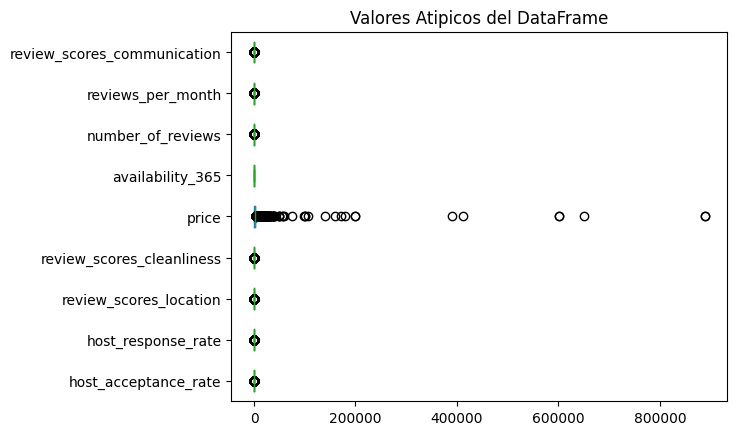

In [ ]:
#FILTRO UNO HOME
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,5))
dfMexico_home1.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()

In [ ]:
#Procedimiento de desviacion estandar para eliminar outliers en dataframe
y= dfMexico_home1
Limite_superior =y.mean() + 3*y.std()
Limite_inferior =y.mean() - 3*y.std()

print('Limite superior permitido', Limite_superior)
print('Limite inferior permitido', Limite_inferior)

Limite superior permitido host_acceptance_rate             146.541964
host_response_rate               139.503410
review_scores_location             5.828167
review_scores_cleanliness          5.985758
price                          46040.610393
availability_365                 610.287502
number_of_reviews                240.176593
reviews_per_month                  7.246853
review_scores_communication        5.938110
dtype: float64
Limite inferior permitido host_acceptance_rate              40.596992
host_response_rate                53.266107
review_scores_location             3.862981
review_scores_cleanliness          3.547918
price                         -41792.706407
availability_365                -128.845636
number_of_reviews               -154.447840
reviews_per_month                 -3.476385
review_scores_communication        3.731220
dtype: float64


In [ ]:
#encontramos los outliers
outlier_home=dfMexico_home1[(y>Limite_superior)|(y<Limite_inferior)]
print(outlier_home)

dfMexico_home1_iqr=dfMexico_home1[(y<=Limite_superior)&(y>=Limite_inferior)]
print(dfMexico_home1_iqr)

       host_acceptance_rate  host_response_rate  review_scores_location  \
0                       NaN                 NaN                     NaN   
1                       NaN                 NaN                     NaN   
2                       NaN                 NaN                     NaN   
3                       NaN                 NaN                     NaN   
4                       NaN                 NaN                     NaN   
...                     ...                 ...                     ...   
24217                   NaN                 NaN                     NaN   
24219                   NaN                 NaN                     NaN   
24220                   NaN                 NaN                     NaN   
24222                   NaN                 NaN                     NaN   
24223                   NaN                 NaN                     NaN   

       review_scores_cleanliness  price  availability_365  number_of_reviews  \
0                  

In [ ]:
dfMexico_homeuno=dfMexico_home1_iqr.copy()
dfMexico_homeuno_clean=dfMexico_homeuno.fillna(round(dfMexico_home1_iqr.mean(),1))
dfMexico_homeuno_clean

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...
24217,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Figure size 1500x500 with 0 Axes>

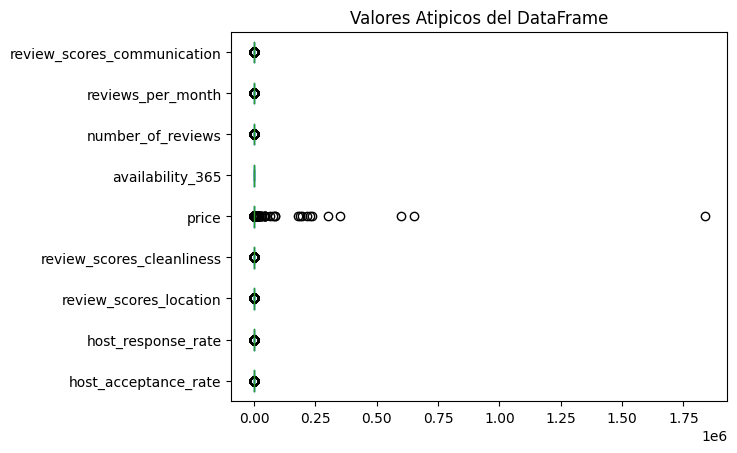

In [ ]:
#FILTRO DOS Private Room
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,5))
dfMexico_proom1.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()

In [ ]:
#Procedimiento de desviacion estandar para eliminar outliers en dataframe
y= dfMexico_proom1
Limite_superior_proom =y.mean() + 3*y.std()
Limite_inferior_proom =y.mean() - 3*y.std()

print('Limite superior permitido', Limite_superior_proom)
print('Limite inferior permitido', Limite_inferior_proom)

Limite superior permitido host_acceptance_rate             163.709552
host_response_rate               161.520239
review_scores_location             6.235750
review_scores_cleanliness          6.320370
price                          73090.899576
availability_365                 628.495006
number_of_reviews                198.263816
reviews_per_month                  7.814981
review_scores_communication        6.336460
dtype: float64
Limite inferior permitido host_acceptance_rate              11.188766
host_response_rate                20.798220
review_scores_location             3.383655
review_scores_cleanliness          3.108726
price                         -70074.651344
availability_365                -122.393079
number_of_reviews               -146.504001
reviews_per_month                 -4.995284
review_scores_communication        3.244153
dtype: float64


In [ ]:
#encontramos los outliers
outlier_proom=dfMexico_proom1[(y>Limite_superior_proom)|(y<Limite_inferior_proom)]
print(outlier_proom)

dfMexico_proom1_iqr=dfMexico_proom1[(y<=Limite_superior_proom)&(y>=Limite_inferior_proom)]
print(dfMexico_proom1_iqr)

       host_acceptance_rate  host_response_rate  review_scores_location  \
7                       NaN                 NaN                     NaN   
16                      0.0                 0.0                     NaN   
17                      0.0                 0.0                     NaN   
18                      0.0                 NaN                     NaN   
21                      NaN                 NaN                     NaN   
...                     ...                 ...                     ...   
24200                   NaN                 NaN                     NaN   
24213                   NaN                 NaN                     NaN   
24215                   NaN                 NaN                     NaN   
24218                   NaN                 NaN                     NaN   
24221                   NaN                 NaN                     NaN   

       review_scores_cleanliness  price  availability_365  number_of_reviews  \
7                  

In [ ]:
dfMexico_roomuno=dfMexico_proom1.copy()
dfMexico_roomuno_clean=dfMexico_roomuno.fillna(round(dfMexico_proom1_iqr.mean(),1))
dfMexico_roomuno_clean

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...
24200,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


In [ ]:
from turtle import color

# **PRIMERA REGRESIÓN HOME**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

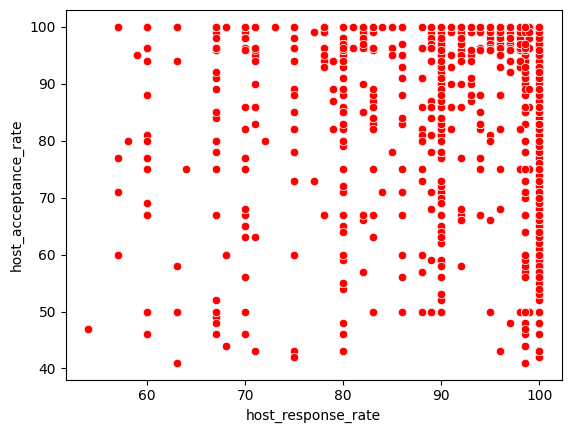

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='red', data=dfMexico_homeuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_home1 = dfMexico_homeuno_clean[['host_response_rate']]
Var_Dep_home1=dfMexico_homeuno_clean['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model_home1=LinearRegression()

#verificamos la función relacionada al modelo
type(model_home1)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_home1.fit(X=Vars_Indep_home1, y=Var_Dep_home1)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_home1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.46724527]),
 'rank_': 1,
 'singular_': array([640.31609011]),
 'intercept_': 50.22890246962053}

### MODELO MAEMÁTICO HOME UNO:
 y=0.467245x + 50.22890246962053

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_home1=model_home1.predict(X=dfMexico_homeuno_clean[['host_response_rate']])
y_pred_home1

array([96.95342921, 96.95342921, 96.95342921, ..., 96.95342921,
       96.95342921, 96.95342921])

In [ ]:
dfMexico_homeuno_clean.insert(0,'Predicciones 1', y_pred_home1)   #--> solo se corre una sola vez
dfMexico_homeuno_clean

,Predicciones 1,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,96.953429,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,96.953429,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,96.953429,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,96.953429,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,96.953429,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...
24217,96.953429,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,96.953429,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,96.953429,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,96.953429,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

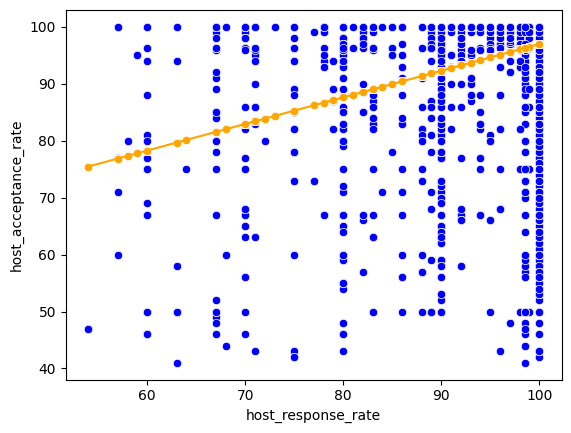

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=dfMexico_homeuno_clean)
sns.scatterplot(x='host_response_rate', y='Predicciones 1', color='orange', data=dfMexico_homeuno_clean)
sns.lineplot(x='host_response_rate', y='Predicciones 1', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_home1=model_home1.score(X=Vars_Indep_home1, y=Var_Dep_home1)
coef_Deter_home1

0.07528555666455528

In [ ]:
#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_home1=np.sqrt(coef_Deter_home1)
coef_Correl_home1

0.2743821361979589

# **SEGUNDA REGRESIÓN HOME**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

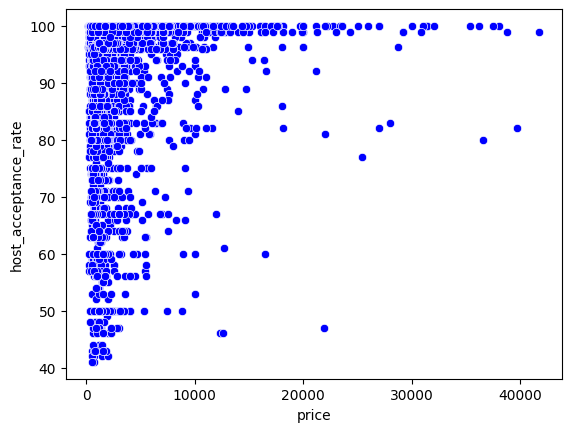

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=dfMexico_homeuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_home2 = dfMexico_homeuno_clean[['price']]
Var_Dep_home2=dfMexico_homeuno_clean['host_acceptance_rate']

In [ ]:
model_home2=LinearRegression()

#verificamos la función relacionada al modelo
type(model_home2)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_home2.fit(X=Vars_Indep_home2, y=Var_Dep_home2)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_home2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.66819761e-06]),
 'rank_': 1,
 'singular_': array([261141.88398711]),
 'intercept_': 96.27122482078484}

### Modelo Matemático Home DOS:

y=-4.668197x + 96.2712248

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_home2=model_home2.predict(X=dfMexico_homeuno_clean[['price']])
y_pred_home2

array([96.26453063, 96.26735022, 96.26436724, ..., 96.26412916,
       96.26562298, 96.26319552])

In [ ]:
dfMexico_homeuno_clean.insert(0,'Predicciones price', y_pred_home2)   #--> solo se corre una sola vez
dfMexico_homeuno_clean

,Predicciones price,Predicciones,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,96.264531,96.953429,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,96.267350,96.953429,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,96.264367,96.953429,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,96.254149,96.953429,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,96.187197,96.953429,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...,...
24217,96.266650,96.953429,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,96.267677,96.953429,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,96.264129,96.953429,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,96.265623,96.953429,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

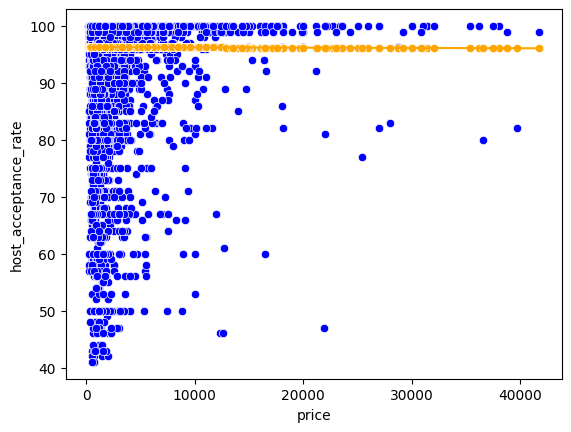

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=dfMexico_homeuno_clean)
sns.scatterplot(x='price', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)
sns.lineplot(x='price', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_home2=model_home2.score(X=Vars_Indep_home2, y=Var_Dep_home2)
print('Coeficiente de Determinación DOS: ',coef_Deter_home2)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_home2=np.sqrt(coef_Deter_home2)
print('Coeficiente de Correlación DOS: ',coef_Correl_home2)

Coeficiente de Determinación DOS:  1.2499266950349863e-06
Coeficiente de Correlación DOS:  0.001118001205292278


# **TERCERA REGRESIÓN HOME**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

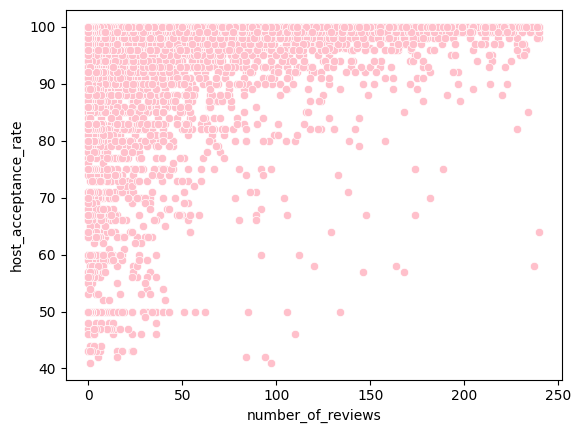

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='pink', data=dfMexico_homeuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_home3 = dfMexico_homeuno_clean[['number_of_reviews']]
Var_Dep_home3=dfMexico_homeuno_clean['host_acceptance_rate']

In [ ]:
model_home3=LinearRegression()

#verificamos la función relacionada al modelo
type(model_home3)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_home3.fit(X=Vars_Indep_home3, y=Var_Dep_home3)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_home3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.02453852]),
 'rank_': 1,
 'singular_': array([5838.1934809]),
 'intercept_': 95.37914318812108}

###Modelo Matemático TRES:

y= 0.02453852x + 95.3791432

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_home3=model_home3.predict(X=dfMexico_homeuno_clean[['number_of_reviews']])
y_pred_home3

array([95.89445205, 96.87599275, 96.33614536, ..., 95.37914319,
       95.37914319, 95.37914319])

In [ ]:
dfMexico_homeuno_clean.insert(0,'Predicciones number of reviews', y_pred_home3)   #--> solo se corre una sola vez
dfMexico_homeuno_clean

,Predicciones number of reviews,Predicciones price,Predicciones,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,95.894452,96.264531,96.953429,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,96.875993,96.267350,96.953429,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,96.336145,96.264367,96.953429,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,95.379143,96.254149,96.953429,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,96.949608,96.187197,96.953429,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...
24217,95.379143,96.266650,96.953429,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,95.379143,96.267677,96.953429,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,95.379143,96.264129,96.953429,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,95.379143,96.265623,96.953429,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

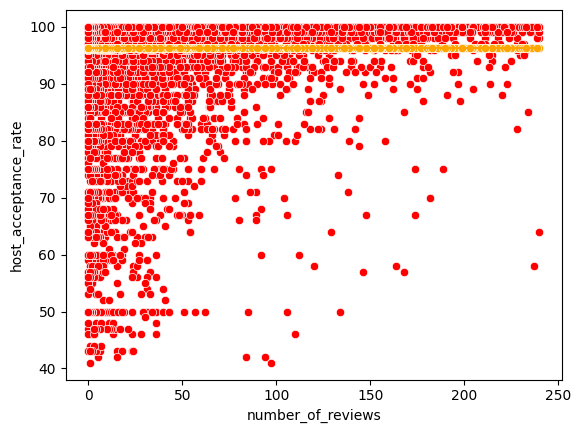

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='red', data=dfMexico_homeuno_clean)
sns.scatterplot(x='number_of_reviews', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)
sns.lineplot(x='number_of_reviews', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_home3=model_home3.score(X=Vars_Indep_home3, y=Var_Dep_home3)
print('Coeficiente de Determinación TRES: ',coef_Deter_home3)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_home3=np.sqrt(coef_Deter_home3)
print('Coeficiente de Correlación TRES: ',coef_Correl_home3)

Coeficiente de Determinación TRES:  0.017261821334896177
Coeficiente de Correlación TRES:  0.13138425071102006


# **CUARTA REGRESIÓN HOME**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

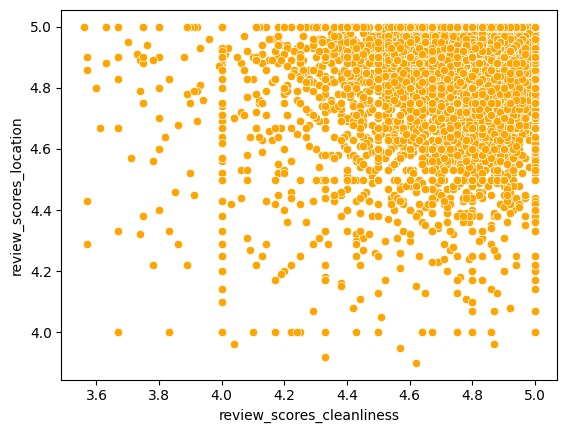

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_home4 = dfMexico_homeuno_clean[['review_scores_cleanliness']]
Var_Dep_home4=dfMexico_homeuno_clean['review_scores_location']

In [ ]:
model_home4=LinearRegression()

#verificamos la función relacionada al modelo
type(model_home4)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_home4.fit(X=Vars_Indep_home4, y=Var_Dep_home4)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_home4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21811201]),
 'rank_': 1,
 'singular_': array([28.97290641]),
 'intercept_': 3.8258552896841262}

###Modelo Matemático CUATRO:

y=0.21811x + 3.82585

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_home4=model_home4.predict(X=dfMexico_homeuno_clean[['review_scores_cleanliness']])
y_pred_home4

array([4.90550972, 4.89024188, 4.85316284, ..., 4.91641532, 4.91641532,
       4.91641532])

In [ ]:
#dfMexico_homeuno_clean.insert(0,'Predicciones review_scores_cleanliness', y_pred_home4)   #--> solo se corre una sola vez
dfMexico_homeuno_clean

,Predicciones number of reviews,Predicciones price,Predicciones,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,95.894452,96.264531,96.953429,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,96.875993,96.267350,96.953429,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,96.336145,96.264367,96.953429,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,95.379143,96.254149,96.953429,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,96.949608,96.187197,96.953429,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...
24217,95.379143,96.266650,96.953429,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,95.379143,96.267677,96.953429,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,95.379143,96.264129,96.953429,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,95.379143,96.265623,96.953429,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

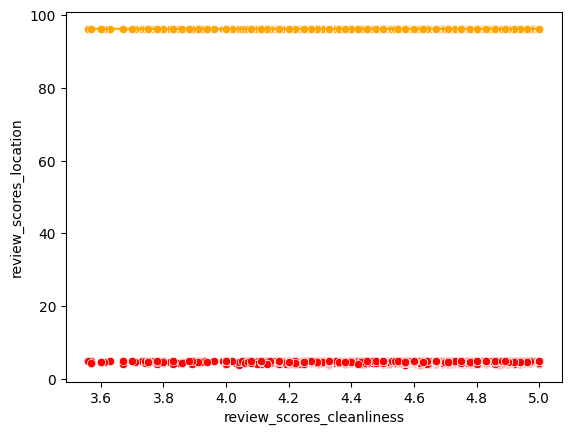

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='red', data=dfMexico_homeuno_clean)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_home4=model_home4.score(X=Vars_Indep_home4, y=Var_Dep_home4)
print('Coeficiente de Determinación CUATRO: ',coef_Deter_home4)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_home4=np.sqrt(coef_Deter_home4)
print('Coeficiente de Correlación CUATRO: ',coef_Correl_home4)

Coeficiente de Determinación CUATRO:  0.07817591677853597
Coeficiente de Correlación CUATRO:  0.27959956505426825


# **QUINTA REGRESIÓN HOME**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

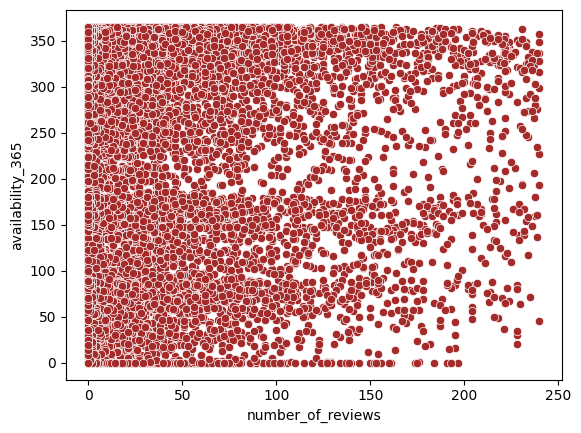

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color='brown', data=dfMexico_homeuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_home5 = dfMexico_homeuno_clean[['number_of_reviews']]
Var_Dep_home5=dfMexico_homeuno_clean['availability_365']

In [ ]:
from sklearn.linear_model import LinearRegression
model_home5=LinearRegression()

#verificamos la función relacionada al modelo
type(model_home5)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_home5.fit(X=Vars_Indep_home5, y=Var_Dep_home5)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_home5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.15534224]),
 'rank_': 1,
 'singular_': array([5838.1934809]),
 'intercept_': 246.31735591439698}

###Modelo Matemático CINCO:

y= -0.1553x + 246.317355

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_home5=model_home5.predict(X=dfMexico_homeuno_clean[['number_of_reviews']])
y_pred_home5

array([243.0551689 , 236.84147935, 240.2590086 , ..., 246.31735591,
       246.31735591, 246.31735591])

In [ ]:
#dfMexico_homeuno_clean.insert(0,'Predicciones number_of_reviews', y_pred_home5)   #--> solo se corre una sola vez
dfMexico_homeuno_clean

,Predicciones number of reviews,Predicciones price,Predicciones,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,95.894452,96.264531,96.953429,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,96.875993,96.267350,96.953429,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,96.336145,96.264367,96.953429,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,95.379143,96.254149,96.953429,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,96.949608,96.187197,96.953429,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...
24217,95.379143,96.266650,96.953429,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,95.379143,96.267677,96.953429,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,95.379143,96.264129,96.953429,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,95.379143,96.265623,96.953429,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

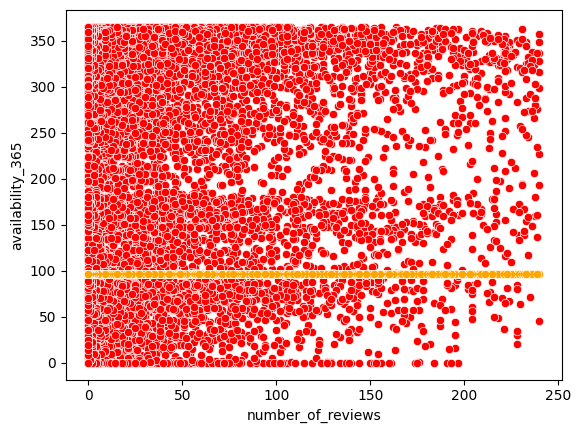

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color='red', data=dfMexico_homeuno_clean)
sns.scatterplot(x='number_of_reviews', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)
sns.lineplot(x='number_of_reviews', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_home5=model_home5.score(X=Vars_Indep_home5, y=Var_Dep_home5)
print('Coeficiente de Determinación CINCO: ',coef_Deter_home5)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_home5=np.sqrt(coef_Deter_home5)
print('Coeficiente de Correlación CINCO: ',coef_Correl_home5)

Coeficiente de Determinación CINCO:  0.0034740879107021394
Coeficiente de Correlación CINCO:  0.058941393864601975


# **SEXTA REGRESIÓN HOME**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

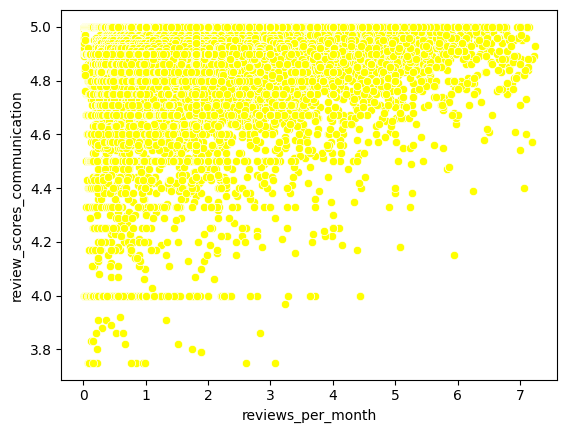

In [ ]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='yellow', data=dfMexico_homeuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_home6 = dfMexico_homeuno_clean[['reviews_per_month']]
Var_Dep_home6=dfMexico_homeuno_clean['review_scores_communication']

In [ ]:
model_home6=LinearRegression()

#verificamos la función relacionada al modelo
type(model_home6)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_home6.fit(X=Vars_Indep_home6, y=Var_Dep_home6)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_home6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00224947]),
 'rank_': 1,
 'singular_': array([180.38275396]),
 'intercept_': 4.866680833061955}

###Modelo Matemático SEIS:

y= 0.002249x + 4.8666

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_home6=model_home6.predict(X=dfMexico_homeuno_clean[['reviews_per_month']])
y_pred_home6

array([4.86710823, 4.86789554, 4.86737817, ..., 4.8689303 , 4.8689303 ,
       4.8689303 ])

In [ ]:
#dfMexico_homeuno_clean.insert(0,'Predicciones reviews_per_month', y_pred_home6)   #--> solo se corre una sola vez
dfMexico_homeuno_clean

,Predicciones number of reviews,Predicciones price,Predicciones,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,95.894452,96.264531,96.953429,90.0,100.0,5.00,4.95,1434.0,324,21.0,0.19,4.95
1,96.875993,96.267350,96.953429,90.0,100.0,4.95,4.88,830.0,346,61.0,0.54,5.00
2,96.336145,96.264367,96.953429,90.0,100.0,4.58,4.71,1469.0,87,39.0,0.31,4.92
3,95.379143,96.254149,96.953429,86.0,100.0,4.98,4.70,3658.0,363,0.0,0.46,4.78
4,96.949608,96.187197,96.953429,86.0,100.0,4.98,4.70,18000.0,357,64.0,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...
24217,95.379143,96.266650,96.953429,100.0,100.0,5.00,5.00,980.0,342,0.0,1.00,5.00
24219,95.379143,96.267677,96.953429,100.0,100.0,5.00,5.00,760.0,352,0.0,1.00,5.00
24220,95.379143,96.264129,96.953429,96.0,100.0,5.00,5.00,1520.0,365,0.0,1.00,5.00
24222,95.379143,96.265623,96.953429,100.0,100.0,5.00,5.00,1200.0,344,0.0,1.00,5.00


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

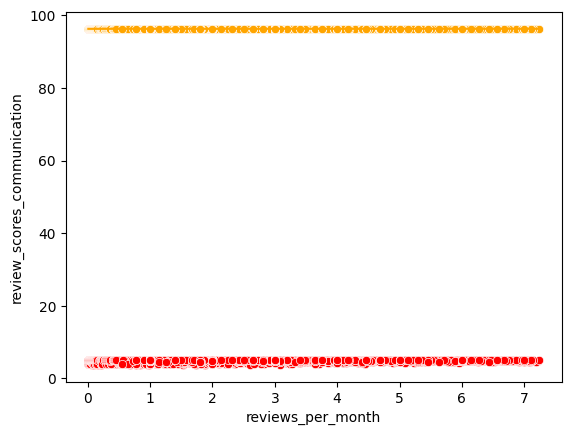

In [ ]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='red', data=dfMexico_homeuno_clean)
sns.scatterplot(x='reviews_per_month', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)
sns.lineplot(x='reviews_per_month', y='Predicciones price', color='orange', data=dfMexico_homeuno_clean)

In [ ]:
#corroboramos cual es el coeficiente  determinación de nuetsro modelo
coef_Deter_home6=model_home6.score(X=Vars_Indep_home6, y=Var_Dep_home6)
print('Coeficiente de Determinación SEIS: ',coef_Deter_home6)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_home6=np.sqrt(coef_Deter_home6)
print('Coeficiente de Correlación SEIS: ',coef_Correl_home6)

Coeficiente de Determinación SEIS:  0.00027950497272810626
Coeficiente de Correlación SEIS:  0.016718402218157877


# PRIMERA REGRESIÓN ROOM

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

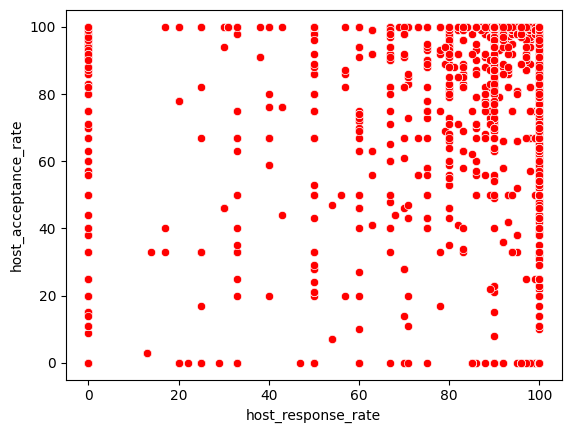

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='red', data=dfMexico_roomuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_room1 = dfMexico_roomuno_clean[['host_response_rate']]
Var_Dep_room1=dfMexico_roomuno_clean['host_acceptance_rate']

In [ ]:
model_room1=LinearRegression()

#verificamos la función relacionada al modelo
type(model_room1)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_room1.fit(X=Vars_Indep_room1, y=Var_Dep_room1)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_room1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.38384575]),
 'rank_': 1,
 'singular_': array([2123.94963366]),
 'intercept_': 52.45807554488466}

###Modelo Matemático ROOM UNO:

y=0.3838x + 52.4581

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_room1=model_room1.predict(X=dfMexico_roomuno_clean[['host_response_rate']])
y_pred_room1

array([90.84265098, 52.45807554, 52.45807554, ..., 90.84265098,
       90.84265098, 90.84265098])

In [ ]:
dfMexico_roomuno_clean.insert(0,'Predicciones host_response_rate ROOM', y_pred_room1)   #--> solo se corre una sola vez
dfMexico_roomuno_clean

,Predicciones host_response_rate ROOM,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,90.842651,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,52.458076,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,52.458076,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,90.842651,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,90.842651,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...
24200,90.842651,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,90.842651,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,90.842651,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,90.842651,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

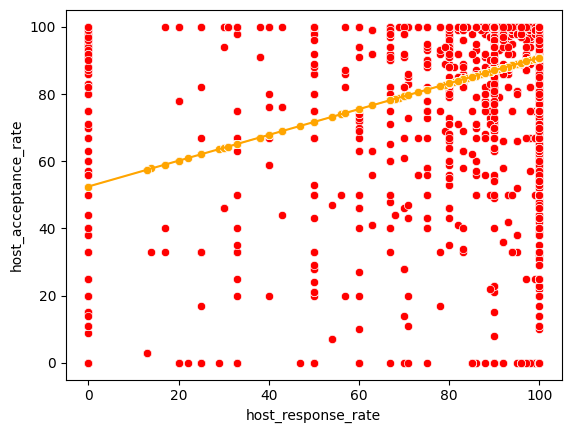

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='red', data=dfMexico_roomuno_clean)
sns.scatterplot(x='host_response_rate', y='Predicciones host_response_rate ROOM', color='orange', data=dfMexico_roomuno_clean)
sns.lineplot(x='host_response_rate', y='Predicciones host_response_rate ROOM', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_room1=model_room1.score(X=Vars_Indep_room1, y=Var_Dep_room1)
print('Coeficiente de Determinación UNO ROOM: ',coef_Deter_room1)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_room1=np.sqrt(coef_Deter_room1)
print('Coeficiente de Correlación UNO ROOM: ',coef_Correl_room1)

Coeficiente de Determinación UNO ROOM:  0.12542367678266764
Coeficiente de Correlación UNO ROOM:  0.35415205319561205



# SEGUNDA REGRESIÓN ROOM

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

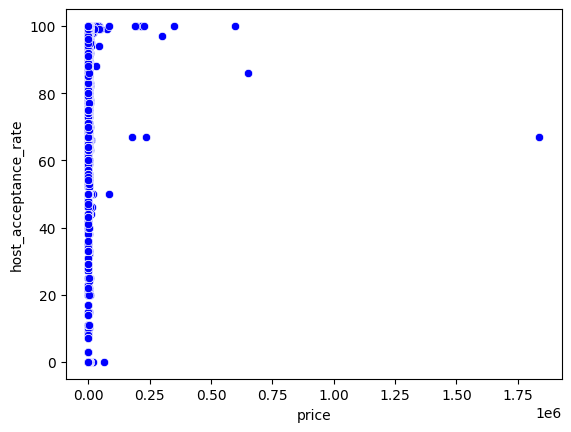

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=dfMexico_roomuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_room2 = dfMexico_roomuno_clean[['price']]
Var_Dep_room2=dfMexico_roomuno_clean['host_acceptance_rate']

In [ ]:
model_room2=LinearRegression()

#verificamos la función relacionada al modelo
type(model_room2)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_room2.fit(X=Vars_Indep_room2, y=Var_Dep_room2)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_room2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.02036348e-06]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 87.45522194888254}

###Modelo MATEMÁTICO DOS ROOM:

y= -4.02004x + 87.455222

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_room2=model_room2.predict(X=dfMexico_roomuno_clean[['price']])
y_pred_room2

array([87.45084377, 87.45230316, 87.45371431, ..., 87.45280973,
       87.45421284, 87.4530791 ])

In [ ]:
dfMexico_roomuno_clean.insert(0,'Predicciones price ROOM', y_pred_room2)   #--> solo se corre una sola vez
dfMexico_roomuno_clean

,Predicciones price ROOM,Predicciones host_response_rate ROOM,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,87.450844,90.842651,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,87.452303,52.458076,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,87.453714,52.458076,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,87.443824,90.842651,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,87.450221,90.842651,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...
24200,87.450076,90.842651,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,87.452207,90.842651,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,87.452810,90.842651,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,87.454213,90.842651,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

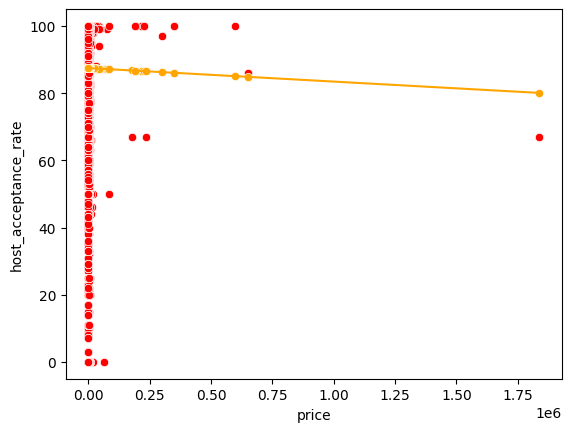

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color='red', data=dfMexico_roomuno_clean)
sns.scatterplot(x='price', y='Predicciones price ROOM', color='orange', data=dfMexico_roomuno_clean)
sns.lineplot(x='price', y='Predicciones price ROOM', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_room2=model_room2.score(X=Vars_Indep_room2, y=Var_Dep_room2)
print('Coeficiente de Determinación DOS ROOM: ',coef_Deter_room2)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_room2=np.sqrt(coef_Deter_room2)
print('Coeficiente de Correlación DOS ROOM: ',coef_Correl_room2)

Coeficiente de Determinación DOS ROOM:  1.4241299630568527e-05
Coeficiente de Correlación DOS ROOM:  0.003773764649599724


# TERCERA REGRESIÓN ROOM

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

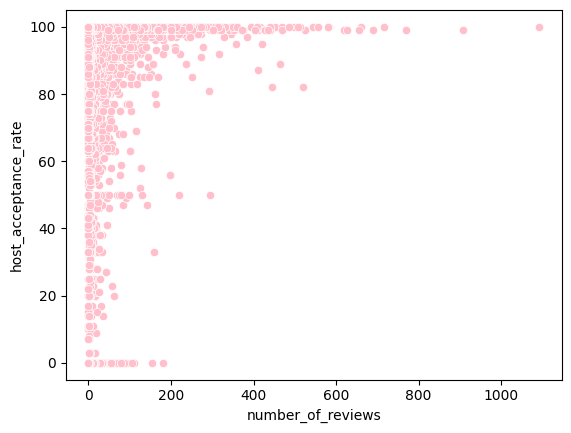

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='pink', data=dfMexico_roomuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_room3 = dfMexico_roomuno_clean[['number_of_reviews']]
Var_Dep_room3=dfMexico_roomuno_clean['host_acceptance_rate']

In [ ]:
model_room3=LinearRegression()
#verificamos la función relacionada al modelo
type(model_room3)

#Ajustamos el modelo con las variables antes declaradas
model_room3.fit(X=Vars_Indep_room3, y=Var_Dep_room3)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_room3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.05639048]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 85.9897784364352}

###Modelo Matemático ROOM TRES:

y= 0.05639x + 85.98978

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_room3=model_room3.predict(X=dfMexico_roomuno_clean[['number_of_reviews']])
y_pred_room3

array([89.48598798, 86.27173082, 86.27173082, ..., 85.98977844,
       85.98977844, 85.98977844])

In [ ]:
dfMexico_roomuno_clean.insert(0,'Predicciones number_of_reviews ROOM', y_pred_room3)   #--> solo se corre una sola vez
dfMexico_roomuno_clean

,Predicciones number_of_reviews ROOM,Predicciones price ROOM,Predicciones host_response_rate ROOM,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,89.485988,87.450844,90.842651,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,86.271731,87.452303,52.458076,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,86.271731,87.453714,52.458076,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,85.989778,87.443824,90.842651,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,85.989778,87.450221,90.842651,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,85.989778,87.450076,90.842651,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,85.989778,87.452207,90.842651,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,85.989778,87.452810,90.842651,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,85.989778,87.454213,90.842651,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

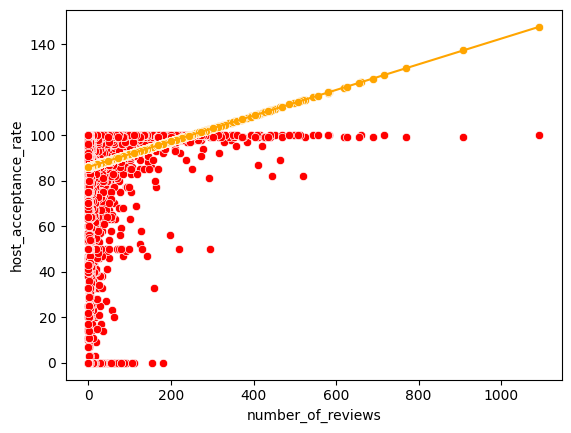

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='red', data=dfMexico_roomuno_clean)
sns.scatterplot(x='number_of_reviews', y='Predicciones number_of_reviews ROOM', color='orange', data=dfMexico_roomuno_clean)
sns.lineplot(x='number_of_reviews', y='Predicciones number_of_reviews ROOM', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_room3=model_room3.score(X=Vars_Indep_room3, y=Var_Dep_room3)
print('Coeficiente de Determinación TRES ROOM: ',coef_Deter_room3)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_room3=np.sqrt(coef_Deter_room3)
print('Coeficiente de Correlación TRES ROOM: ',coef_Correl_room3)

Coeficiente de Determinación TRES ROOM:  0.01624826133492374
Coeficiente de Correlación TRES ROOM:  0.12746866805189322


# CUARTA REGRESIÓN ROOM

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

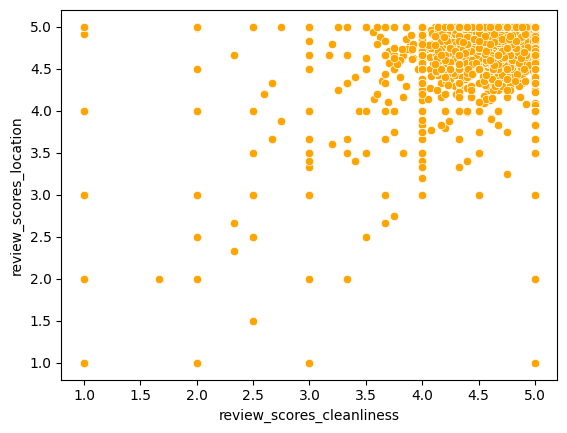

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_room4 = dfMexico_roomuno_clean[['review_scores_cleanliness']]
Var_Dep_room4=dfMexico_roomuno_clean['review_scores_location']

In [ ]:
model_room4=LinearRegression()
#verificamos la función relacionada al modelo
type(model_room4)

#Ajustamos el modelo con las variables antes declaradas
model_room4.fit(X=Vars_Indep_room4, y=Var_Dep_room4)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_room4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.65108736]),
 'rank_': 1,
 'singular_': array([48.47407526]),
 'intercept_': 1.7401201032407543}

###Modelo Matemático:

y= 0.6511x + 1.74012

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_room4=model_room4.predict(X=dfMexico_roomuno_clean[['review_scores_cleanliness']])
y_pred_room4

array([4.93044818, 4.47468703, 4.73512197, ..., 4.99555692, 4.99555692,
       4.99555692])

In [ ]:
dfMexico_roomuno_clean.insert(0,'Predicciones review_scores_cleanliness ROOM', y_pred_room4)   #--> solo se corre una sola vez
dfMexico_roomuno_clean

,Predicciones review_scores_cleanliness ROOM,Predicciones number_of_reviews ROOM,Predicciones price ROOM,Predicciones host_response_rate ROOM,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,4.930448,89.485988,87.450844,90.842651,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,4.474687,86.271731,87.452303,52.458076,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,4.735122,86.271731,87.453714,52.458076,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,4.995557,85.989778,87.443824,90.842651,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,4.936959,85.989778,87.450221,90.842651,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,4.995557,85.989778,87.450076,90.842651,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,4.995557,85.989778,87.452207,90.842651,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,4.995557,85.989778,87.452810,90.842651,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,4.995557,85.989778,87.454213,90.842651,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

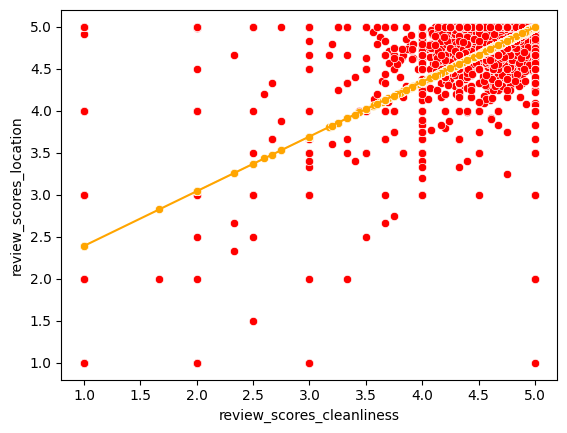

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='red', data=dfMexico_roomuno_clean)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones review_scores_cleanliness ROOM', color='orange', data=dfMexico_roomuno_clean)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones review_scores_cleanliness ROOM', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_room4=model_room4.score(X=Vars_Indep_room4, y=Var_Dep_room4)
print('Coeficiente de Determinación CUATRO ROOM: ',coef_Deter_room4)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_room4=np.sqrt(coef_Deter_room4)
print('Coeficiente de Correlación CUATRO ROOM: ',coef_Correl_room4)

Coeficiente de Determinación CUATRO ROOM:  0.537533133076402
Coeficiente de Correlación CUATRO ROOM:  0.7331665111530955


# QUINTA REGRESIÓN ROOM

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

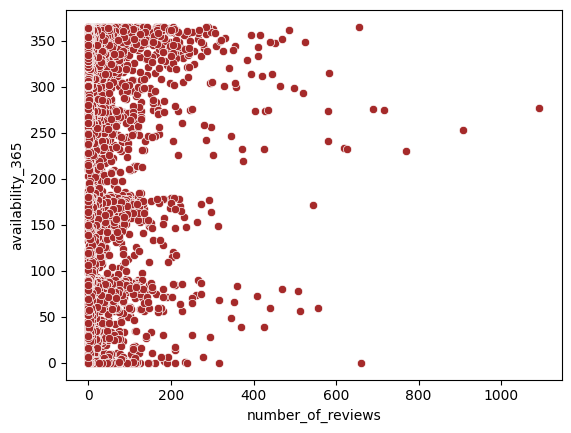

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color='brown', data=dfMexico_roomuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_room5 = dfMexico_roomuno_clean[['number_of_reviews']]
Var_Dep_room5=dfMexico_roomuno_clean['availability_365']

In [ ]:
model_room5=LinearRegression()
#verificamos la función relacionada al modelo
type(model_room5)

#Ajustamos el modelo con las variables antes declaradas
model_room5.fit(X=Vars_Indep_room5, y=Var_Dep_room5)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_room5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.09364539]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 255.47449731231168}

###Modelo Matemático:

y= -0.093645x + 255.47449

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_room5=model_room5.predict(X=dfMexico_roomuno_clean[['number_of_reviews']])
y_pred_room5

array([249.66848285, 255.00627034, 255.00627034, ..., 255.47449731,
       255.47449731, 255.47449731])

In [ ]:
dfMexico_roomuno_clean.insert(0,'Predicciones number_of_reviews ROOM5', y_pred_room5)   #--> solo se corre una sola vez
dfMexico_roomuno_clean

,Predicciones number_of_reviews ROOM5,Predicciones review_scores_cleanliness ROOM,Predicciones number_of_reviews ROOM,Predicciones price ROOM,Predicciones host_response_rate ROOM,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,249.668483,4.930448,89.485988,87.450844,90.842651,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,255.006270,4.474687,86.271731,87.452303,52.458076,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,255.006270,4.735122,86.271731,87.453714,52.458076,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,255.474497,4.995557,85.989778,87.443824,90.842651,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,255.474497,4.936959,85.989778,87.450221,90.842651,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,255.474497,4.995557,85.989778,87.450076,90.842651,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,255.474497,4.995557,85.989778,87.452207,90.842651,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,255.474497,4.995557,85.989778,87.452810,90.842651,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,255.474497,4.995557,85.989778,87.454213,90.842651,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

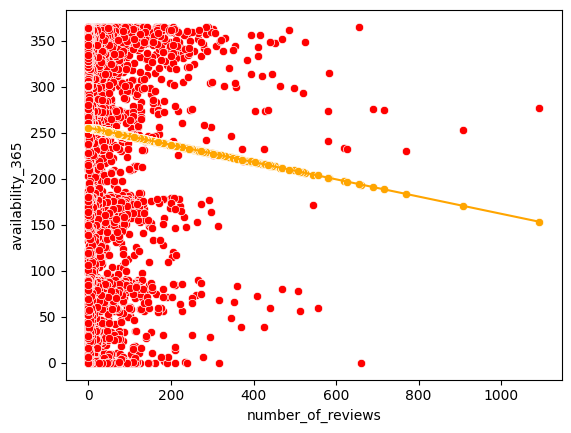

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color='red', data=dfMexico_roomuno_clean)
sns.scatterplot(x='number_of_reviews', y='Predicciones number_of_reviews ROOM5', color='orange', data=dfMexico_roomuno_clean)
sns.lineplot(x='number_of_reviews', y='Predicciones number_of_reviews ROOM5', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_room5=model_room5.score(X=Vars_Indep_room5, y=Var_Dep_room5)
print('Coeficiente de Determinación CINCO ROOM: ',coef_Deter_room5)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_room5=np.sqrt(coef_Deter_room5)
print('Coeficiente de Correlación CINCO ROOM: ',coef_Correl_room5)

Coeficiente de Determinación CINCO ROOM:  0.001848740094272383
Coeficiente de Correlación CINCO ROOM:  0.04299697773416619


# SEXTA REGRESIÓN ROOM

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

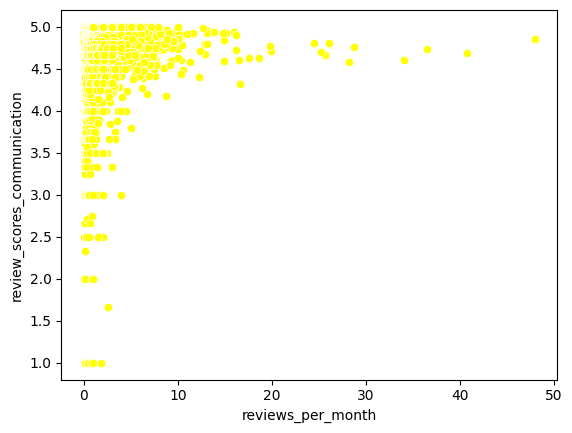

In [ ]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='yellow', data=dfMexico_roomuno_clean)

In [ ]:
#declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_room6 = dfMexico_roomuno_clean[['reviews_per_month']]
Var_Dep_room6=dfMexico_roomuno_clean['review_scores_communication']

In [ ]:
model_room6=LinearRegression()
#verificamos la función relacionada al modelo
type(model_room6)

#Ajustamos el modelo con las variables antes declaradas
model_room6.fit(X=Vars_Indep_room6, y=Var_Dep_room6)

LinearRegression()

In [ ]:
#verificamos los coeficientes
model_room6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01082048]),
 'rank_': 1,
 'singular_': array([193.34825992]),
 'intercept_': 4.77505078468429}

###Modelo Matemático:

y=0.010820x + 4.7750508

In [ ]:
#predecimos los valores de host_response_rate a partir de la variable 'host_acceptance_rate'
y_pred_room6=model_room6.predict(X=dfMexico_roomuno_clean[['reviews_per_month']])
y_pred_room6

array([4.78522203, 4.7754836 , 4.7754836 , ..., 4.78587126, 4.78587126,
       4.78587126])

In [ ]:
dfMexico_roomuno_clean.insert(0,'Predicciones reviews_per_month ROOM', y_pred_room6)   #--> solo se corre una sola vez
dfMexico_roomuno_clean

,Predicciones reviews_per_month ROOM,Predicciones number_of_reviews ROOM5,Predicciones review_scores_cleanliness ROOM,Predicciones number_of_reviews ROOM,Predicciones price ROOM,Predicciones host_response_rate ROOM,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,4.785222,249.668483,4.930448,89.485988,87.450844,90.842651,100.0,100.0,4.94,4.90,1089.0,168,62,0.94,4.95
16,4.775484,255.006270,4.474687,86.271731,87.452303,52.458076,0.0,0.0,4.80,4.20,726.0,363,5,0.04,4.60
17,4.775484,255.006270,4.735122,86.271731,87.453714,52.458076,0.0,0.0,4.40,4.60,375.0,284,5,0.04,4.80
18,4.776349,255.474497,4.995557,85.989778,87.443824,90.842651,0.0,100.0,4.89,5.00,2835.0,365,0,0.12,4.78
21,4.776133,255.474497,4.936959,85.989778,87.450221,90.842651,40.0,100.0,5.00,4.91,1244.0,88,0,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,4.785871,255.474497,4.995557,85.989778,87.450076,90.842651,100.0,100.0,5.00,5.00,1280.0,301,0,1.00,5.00
24213,4.785871,255.474497,4.995557,85.989778,87.452207,90.842651,100.0,100.0,5.00,5.00,750.0,176,0,1.00,5.00
24215,4.785871,255.474497,4.995557,85.989778,87.452810,90.842651,100.0,100.0,5.00,5.00,600.0,345,0,1.00,5.00
24218,4.785871,255.474497,4.995557,85.989778,87.454213,90.842651,100.0,100.0,5.00,5.00,251.0,364,0,1.00,5.00


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

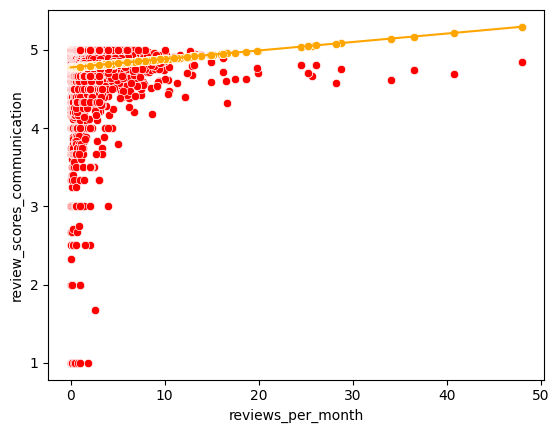

In [ ]:
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='red', data=dfMexico_roomuno_clean)
sns.scatterplot(x='reviews_per_month', y='Predicciones reviews_per_month ROOM', color='orange', data=dfMexico_roomuno_clean)
sns.lineplot(x='reviews_per_month', y='Predicciones reviews_per_month ROOM', color='orange', data=dfMexico_roomuno_clean)

In [ ]:
#corroboramos cual es el coeficiente de determinación de nuetsro modelo
coef_Deter_room6=model_room6.score(X=Vars_Indep_room6, y=Var_Dep_room6)
print('Coeficiente de Determinación SEIS ROOM: ',coef_Deter_room6)

#corroboramos cual es el coeficiente de correlación de nuetsro modelo
coef_Correl_room6=np.sqrt(coef_Deter_room6)
print('Coeficiente de Correlación SEIS ROOM: ',coef_Correl_room6)

Coeficiente de Determinación SEIS ROOM:  0.002009295979098269
Coeficiente de Correlación SEIS ROOM:  0.044825171266803535
